# ML Course 4 - Practice (multiple and polynomial regressions)

## Subject

We will use here the same data set as for practice #3.

**`FuelConsumption.csv`** is a vehicle fuel consumption data set that contains model-specific fuel consumption.
-   **MODELYEAR** e.g. 2014
-   **MAKE** e.g. Acura
-   **MODEL** e.g. ILX
-   **VEHICLE CLASS** e.g. SUV
-   **ENGINE SIZE** e.g. 4.7
-   **CYLINDERS** e.g 6
-   **TRANSMISSION** e.g. A6
-   **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
-   **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
-   **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
-   **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn 

In [67]:
data = pd.read_csv("FuelConsumption.csv")

In [68]:
data.sample(6)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
811,2014,MINI,JOHN COOPER WORKS COUPE,TWO-SEATER,1.6,4,M6,Z,9.1,6.7,8.0,35,184
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
198,2014,CHEVROLET,CRUZE,MID-SIZE,1.4,4,M6,X,9.1,6.3,7.8,36,179
278,2014,CHRYSLER,200 CONVERTIBLE FFV,COMPACT,3.6,6,A6,E,17.0,11.2,14.4,20,230
740,2014,MERCEDES-BENZ,E 300 4MATIC,MID-SIZE,3.5,6,AS7,Z,11.8,8.2,10.2,28,235
405,2014,FORD,FOCUS FFV,COMPACT,2.0,4,M5,X,9.1,6.6,8.0,35,184


* Make some plots of 'CYLINDERS', 'ENGINESIZE', 'FUELCONSUMPTION_COMB', with respect to 'CO2EMISSIONS'. What do these plots tell you about your capacity to model C02 emissions with a multiple regression model based on the three features?

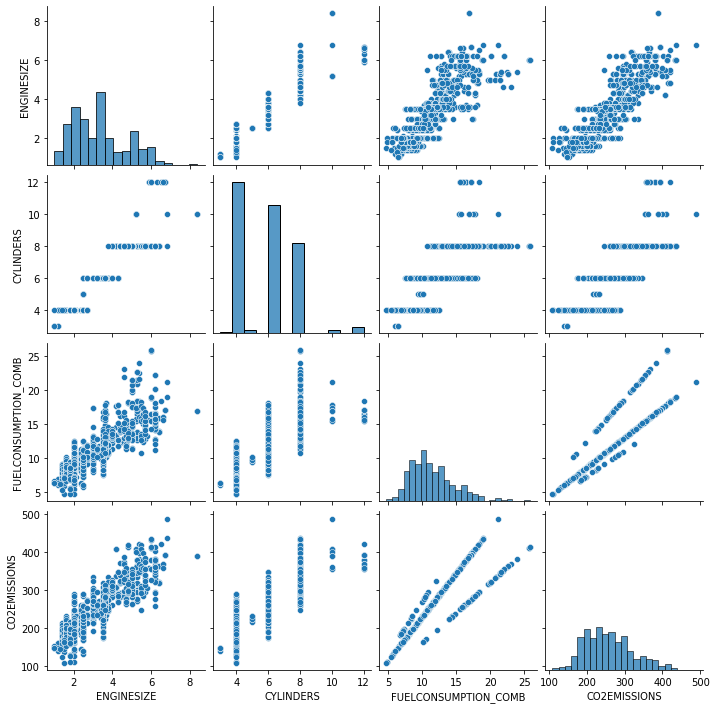

In [69]:
# find relationship between colums
sns.pairplot(data[[ 'ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS' ]])

<AxesSubplot:>

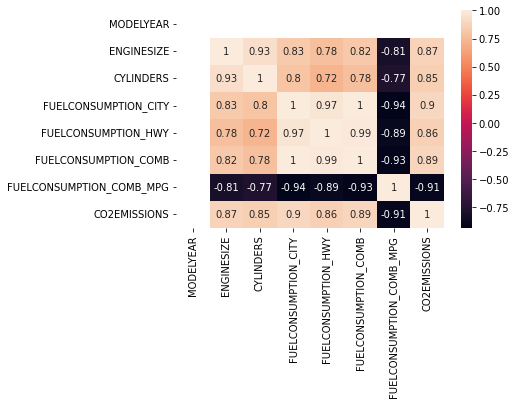

In [70]:
sns.heatmap(data.corr(), annot=True)

* Train a multiple linear regression with these three predictors. What are the coefficients associated with each predictor?

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = data[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']]
y = data['CO2EMISSIONS'].values.reshape(-1,1)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.25, random_state = 0)

X_train_single = X_train[['ENGINESIZE']]
X_val_single = X_val[['ENGINESIZE']]

reg_single = LinearRegression()
reg_single.fit(X_train_single, y_train)
print("The linear model is: Y = {:.2}  +  {:.2} * TV".format(reg_single.intercept_[0], reg_single.coef_[0][0]))


The linear model is: Y = 1.3e+02  +  3.9e+01 * TV


* Assess the performance of your model. What do you think, when compared with the accuracy of the linear regression with 'FUELCONSUMPTION_COMB' as single predictor (computed in last question of practice #3)?

In [72]:
y_single_pred = reg_single.predict(X_val_single)

In [73]:
from sklearn.metrics import r2_score

def evaluate_regression(y_pred, y_val):
    y_pred = y_pred.squeeze()
    y_val = y_val.squeeze()
    print("Mean square error (MSE): %.2f" % np.mean((y_pred - y_val) ** 2))
    print("Root mean square error (RMSE): %.2f" % np.sqrt(np.mean((y_pred - y_val) ** 2)))
    print("Mean absolute error (MAE): %.2f" % np.mean(abs(y_pred - y_val)))
    print("Coefficient of determination (R^2): %.2f" % r2_score(y_val, y_pred))

evaluate_regression(y_single_pred, y_val)

Mean square error (MSE): 1139.99
Root mean square error (RMSE): 33.76
Mean absolute error (MAE): 25.60
Coefficient of determination (R^2): 0.72


* 'FUELCONSUMPTION_CITY' is the urban consumption while FUELCONSUMPTION_HWY is the consumption on the highway. 'FUELCONSUMPTION_COMB' is the combined consumption and is computed as a weighted sum of 'FUELCONSUMPTION_CITY' and 'FUELCONSUMPTION_HWY' so to represent a standard driver behaviour. How are these three features correlated between each other?

- Correlation is always high between the features.

In [74]:
data[['FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_COMB']].sample(10)

,FUELCONSUMPTION_HWY,FUELCONSUMPTION_CITY,FUELCONSUMPTION_COMB
404,8.5,11.7,10.3
607,6.8,9.7,8.4
171,9.1,12.8,11.1
217,14.2,18.3,16.5
81,6.5,10.0,8.4
875,8.3,11.6,10.1
892,8.1,12.2,10.4
961,11.1,14.7,13.1
440,18.5,23.9,21.5
256,7.0,8.7,7.9


In [75]:
data3 = data[['FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_COMB']]
data3.corr()

,FUELCONSUMPTION_HWY,FUELCONSUMPTION_CITY,FUELCONSUMPTION_COMB
FUELCONSUMPTION_HWY,1.000000,0.965718,0.985804
FUELCONSUMPTION_CITY,0.965718,1.000000,0.995542
FUELCONSUMPTION_COMB,0.985804,0.995542,1.000000


* Add 'FUELCONSUMPTION_CITY' and 'FUELCONSUMPTION_HWY' as additional predictors to your model of question #2. What is the gain of accuracy, and how do you interpret that?

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = data[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_CITY']]
y = data['CO2EMISSIONS'].values.reshape(-1,1)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.25, random_state = 0)

X_train_single = X_train[['ENGINESIZE']]
X_val_single = X_val[['ENGINESIZE']]

reg_single = LinearRegression()
reg_single.fit(X_train_single, y_train)
print("The linear model is: Y = {:.2}  +  {:.2} * TV".format(reg_single.intercept_[0], reg_single.coef_[0][0]))


The linear model is: Y = 1.3e+02  +  3.9e+01 * TV


* Plot 'CO2EMISSIONS' with respect to 'FUELCONSUMPTION_COMB' for each possible value of 'FUELTYPE' (i.e. plot the scatter dots with one distinct color for each value of 'FUELTYPE'). Do you think that 'FUELTYPE' and 'FUELCONSUMPTION_COMB' could be sufficient predictors for 'CO2EMISSIONS' estimation with a multiple linear regression model? Compute the accuracy.
* It would be sufficient to use with a multiple linear regression model. The accuracy would be high because of the coreelation between them.

<AxesSubplot:xlabel='FUELCONSUMPTION_COMB', ylabel='CO2EMISSIONS'>

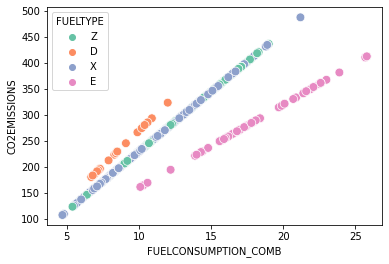

In [77]:
sns.scatterplot(data=data, x='FUELCONSUMPTION_COMB', y='CO2EMISSIONS', hue='FUELTYPE', palette='Set2', s=77)